# The Sparks Foundation Internship (APR 2024) - Data Science and Business Analytics
Author: Roshni Sanjay Jadhav



    

Problem Statement:
Perform Exploratory data analysis on retail dataset.

As a business manager try to find out weak areas where u can work to make profit.
What all business problems u can derive by exploring the data ?


Importing Libraries 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Importing Data

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()   #To view first 5 rows of data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Exploratory Data Analysis

In [4]:
df.shape    #To view total number of rows and columns

(9994, 13)

There are total 9994 rows and 13 columns

In [6]:
df.info()   #To view total entries, column names, missing values, datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()     #To check missing values 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values present in the data

In [12]:
df.duplicated().sum()    #To check for duplicates  

17

Out of 9994 entries, we have 17 duplicates that is quite low so we can drop them.

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [17]:
df.nunique()          #It gives the count of unique value present in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [20]:
df.drop(columns='Postal Code',axis=1,inplace=True)

Postal code columns do not contribute any significant results so we can drop the column

In [71]:
df.describe()         #Statistical summary of data

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


**SALES:**
- The average sale amount is &#36;230.15.
- 50% of the sales fall below &#36;54.82.

**Quantity:**
- On average, 3.79 items are sold per transaction.

**Discount:**
- The average discount applied is 15.63%.

**PROFIT:**
- The average profit per transaction is &#36;28.69.




In [24]:
df['Ship Mode'].value_counts().to_frame()

,Ship Mode
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


In [25]:
df['Segment'].value_counts().to_frame()

,Segment
Consumer,5183
Corporate,3015
Home Office,1779


In [26]:
df['Country'].value_counts().to_frame()

,Country
United States,9977


Here, it indicates an overwhelming majority of entries originating from the US. 

In [27]:
df['Region'].value_counts().to_frame()

,Region
West,3193
East,2845
Central,2319
South,1620


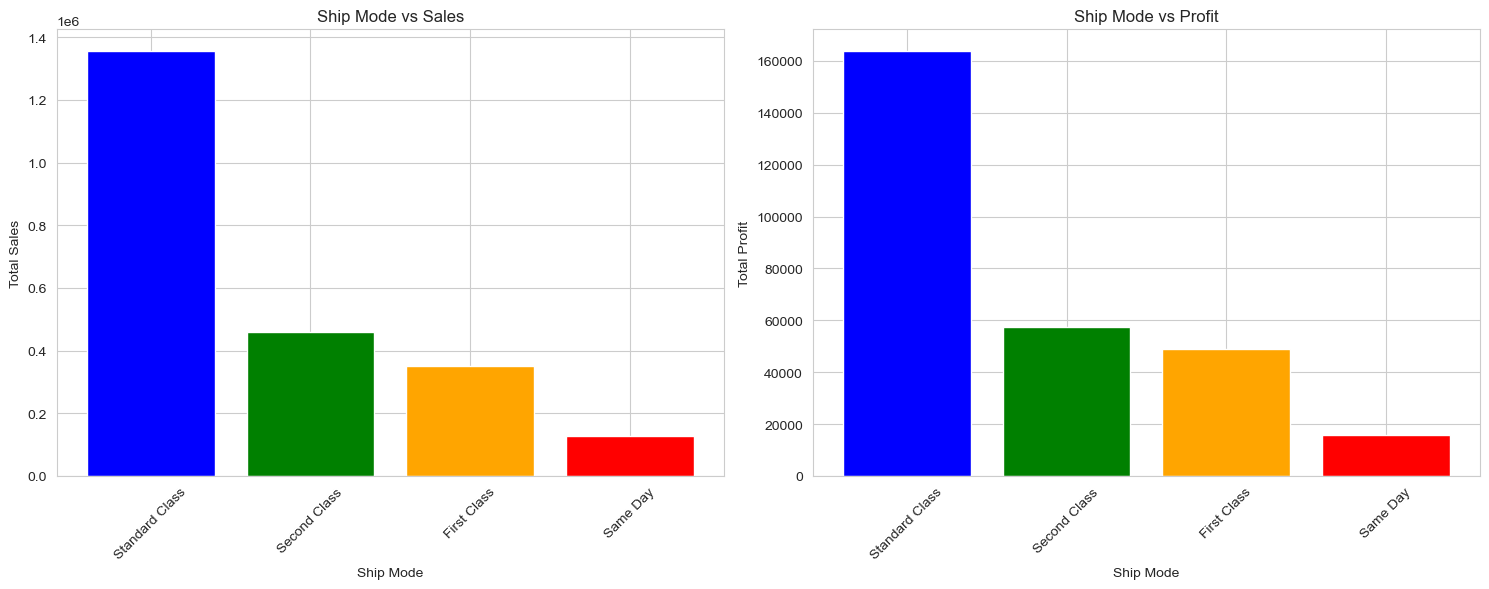

In [37]:
#Group by ship mode and calculate total sales and profit
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].sum().reset_index()

#Sort by total sales and profit in descending order
sales_by_ship_mode = sales_by_ship_mode.sort_values(by='Sales', ascending=False)
profit_by_ship_mode = profit_by_ship_mode.sort_values(by='Profit', ascending=False)

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Plot for Ship Mode vs Sales
axs[0].bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color=['blue', 'green', 'orange', 'red'])
axs[0].set_title('Ship Mode vs Sales')
axs[0].set_xlabel('Ship Mode')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params(axis='x')

#Plot for Ship Mode vs Profit
axs[1].bar(profit_by_ship_mode['Ship Mode'], profit_by_ship_mode['Profit'], color=['blue', 'green', 'orange', 'red'])
axs[1].set_title('Ship Mode vs Profit')
axs[1].set_xlabel('Ship Mode')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params(axis='x')

#Adjust layout
plt.tight_layout()
plt.show()






We can see that standard class has recorded highest profit and same day has recorded lowest profit.

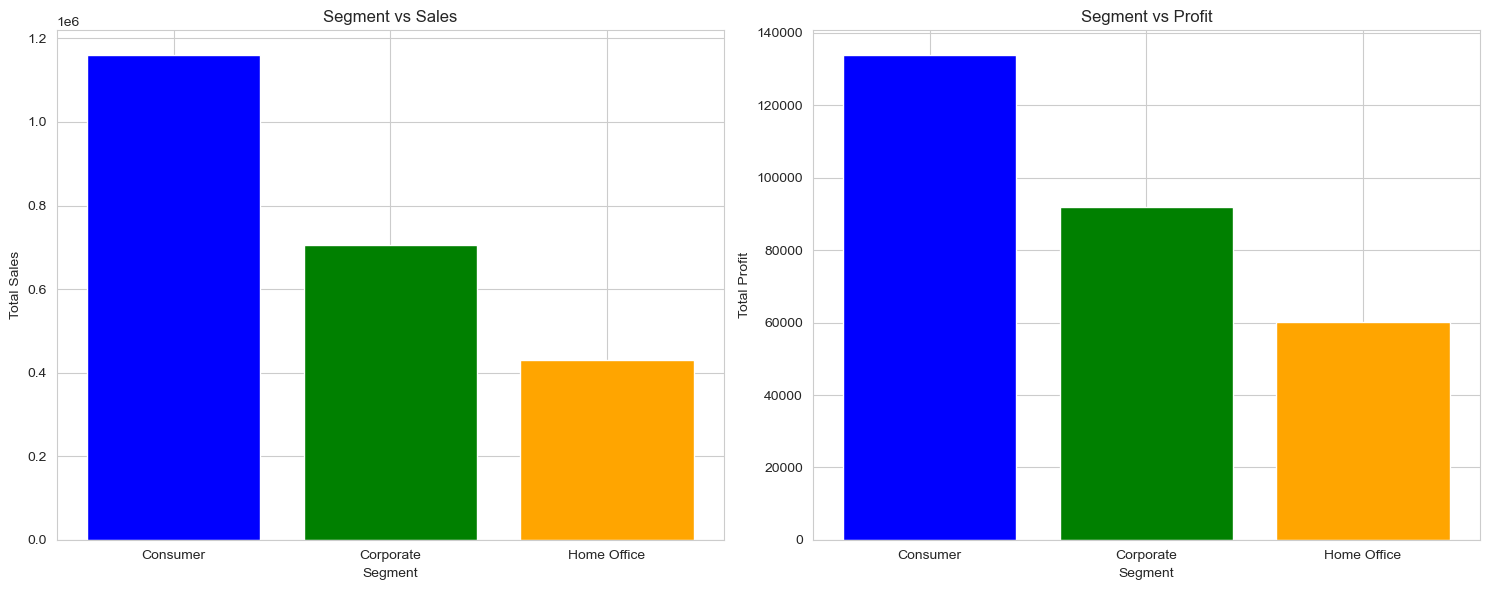

In [39]:
#Group by segment and calculate total sales and profit
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

#Sort by total sales and profit in descending order
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)
profit_by_segment = profit_by_segment.sort_values(by='Profit', ascending=False)

#Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#Plot for Segment vs Sales
axs[0].bar(sales_by_segment['Segment'], sales_by_segment['Sales'], color=['blue', 'green', 'orange'])
axs[0].set_title('Segment vs Sales')
axs[0].set_xlabel('Segment')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params(axis='x')

#Plot for Segment vs Profit
axs[1].bar(profit_by_segment['Segment'], profit_by_segment['Profit'], color=['blue', 'green', 'orange'])
axs[1].set_title('Segment vs Profit')
axs[1].set_xlabel('Segment')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params(axis='x')

#Adjust layout
plt.tight_layout()
plt.show()


Here, out of 3 segments, consumer has recorded maximum profit followed by corporate and lowest is of home office.

In [40]:
df.groupby('Category')['Sub-Category'].value_counts().to_frame()

Sub-Category
Category        Sub-Category              
Furniture       Furnishings            956
                Chairs                 615
                Tables                 319
                Bookcases              228
Office Supplies Binders               1522
                Paper                 1359
                Storage                846
                Art                    795
                Appliances             466
                Labels                 363
                Envelopes              254
                Fasteners              217
                Supplies               190
Technology      Phones                 889
                Accessories            775
                Machines               115
                Copiers                 68

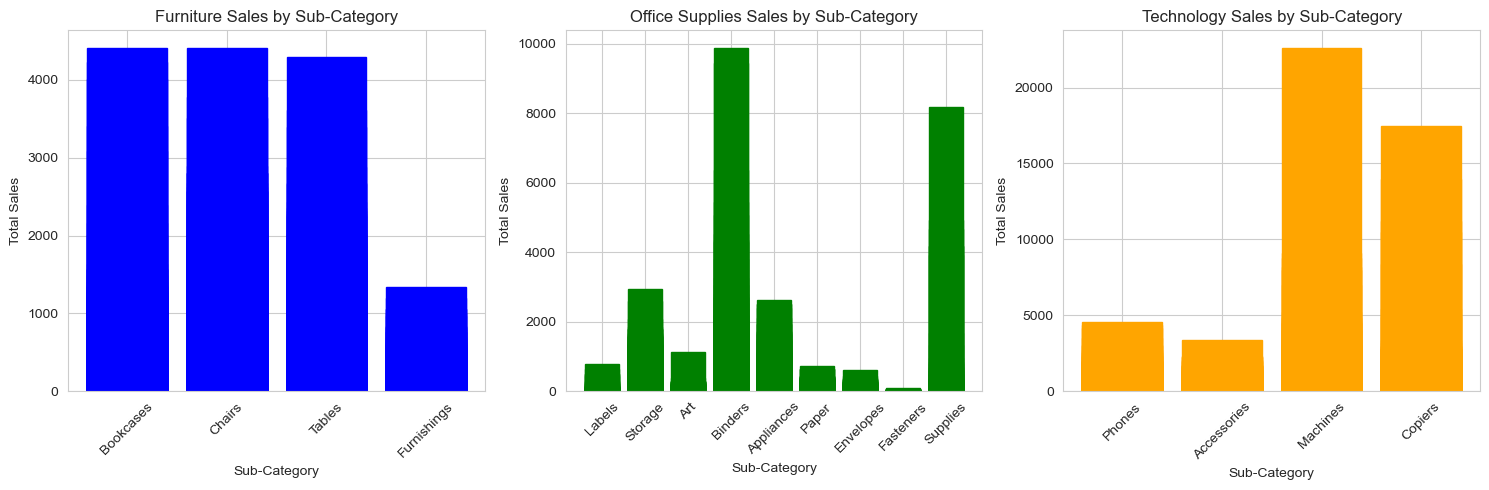

In [44]:
# Filter data for each category
furniture_data = df[df['Category'] == 'Furniture']
office_supplies_data = df[df['Category'] == 'Office Supplies']
technology_data = df[df['Category'] == 'Technology']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Furniture
axs[0].bar(furniture_data['Sub-Category'], furniture_data['Sales'], color='blue', edgecolor='blue', width=0.8)
axs[0].set_title('Furniture Sales by Sub-Category')
axs[0].set_xlabel('Sub-Category')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params(axis='x', rotation=45)

# Plot for Office Supplies
axs[1].bar(office_supplies_data['Sub-Category'], office_supplies_data['Sales'], color='green', edgecolor='green', width=0.8)
axs[1].set_title('Office Supplies Sales by Sub-Category')
axs[1].set_xlabel('Sub-Category')
axs[1].set_ylabel('Total Sales')
axs[1].tick_params(axis='x', rotation=45)

# Plot for Technology
axs[2].bar(technology_data['Sub-Category'], technology_data['Sales'], color='orange', edgecolor='orange', width=0.8)
axs[2].set_title('Technology Sales by Sub-Category')
axs[2].set_xlabel('Sub-Category')
axs[2].set_ylabel('Total Sales')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()




In [48]:
data=['Sales','Quantity','Profit','Discount','State','Category','Sub-Category','Segment']
data=df[data]
data=data.sort_values(by='Profit',ascending=False)
data
df1=pd.pivot_table(data,index=['Category','Sub-Category'])
df1

Discount      Profit  Quantity        Sales
Category        Sub-Category                                             
Furniture       Bookcases     0.211140  -15.230509  3.807018   503.859633
                Chairs        0.170244   43.198582  3.822764   532.971969
                Furnishings   0.138494   13.653476  3.723849    95.902745
                Tables        0.261285  -55.565771  3.890282   648.794771
Office Supplies Appliances    0.166524   38.922758  3.710300   230.755710
                Art           0.074969    8.207059  3.768553    34.096896
                Binders       0.372011   19.860710  3.923127   133.645972
                Envelopes     0.080315   27.418019  3.566929    64.867724
                Fasteners     0.082028    4.375660  4.211982    13.936774
                Labels        0.068871   15.224193  3.845730    34.283504
                Paper         0.074908   24.977365  3.785136    57.560075
                Storage       0.074704   25.152277  3.732861   264.590553
                Supplies      0.076842   -6.258418  3.405263   245.650200
Technology      Accessories   0.078452   54.111788  3.840000   215.974604
                Copiers       0.161765  817.909190  3.441176  2198.941618
                Machines      0.306087   29.432669  3.826087  1645.553313
                Phones        0.154556   50.073938  3.699663   371.211534

1. We can observe that when discount given is beyond 20%, company incurred a loss.
2. Maximum profit is gained by copiers, phones, accessories,paper and binders whereas tables , bookcases and supplies has incurred maximum loss.

In [49]:
df.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.14600,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.35285,46.7908,26.27735,6.7068,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.7130
Home Office,15.45460,37.2300,16.79860,7.2576,-18.2220,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


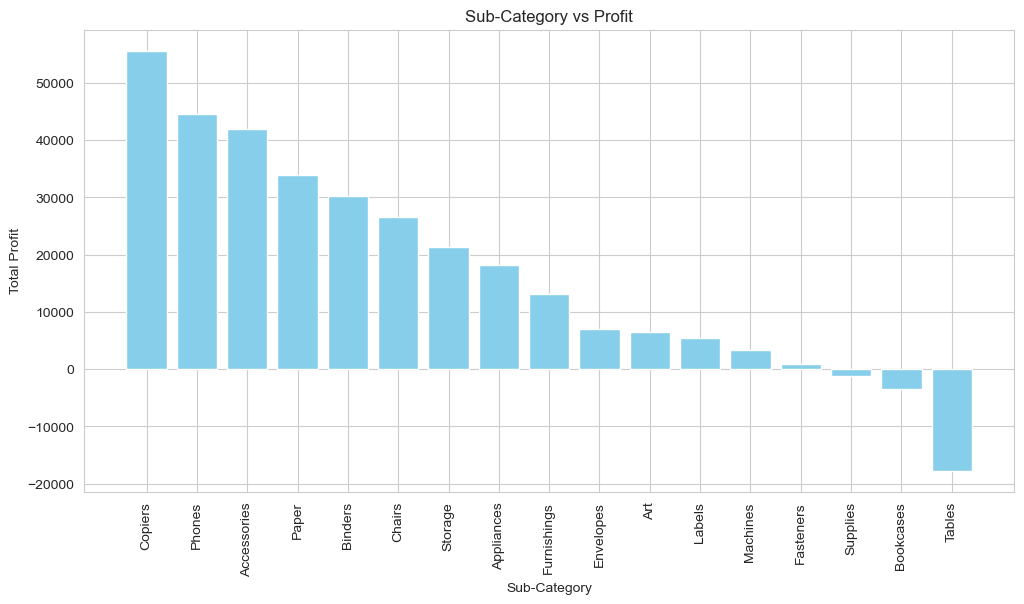

In [50]:
# Group by sub-category and calculate total profit
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort by total profit in descending order
profit_by_subcategory = profit_by_subcategory.sort_values(by='Profit', ascending=False)

# Plot Sub-Category vs Profit
plt.figure(figsize=(12, 6))
plt.bar(profit_by_subcategory['Sub-Category'], profit_by_subcategory['Profit'], color='skyblue')
plt.title('Sub-Category vs Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


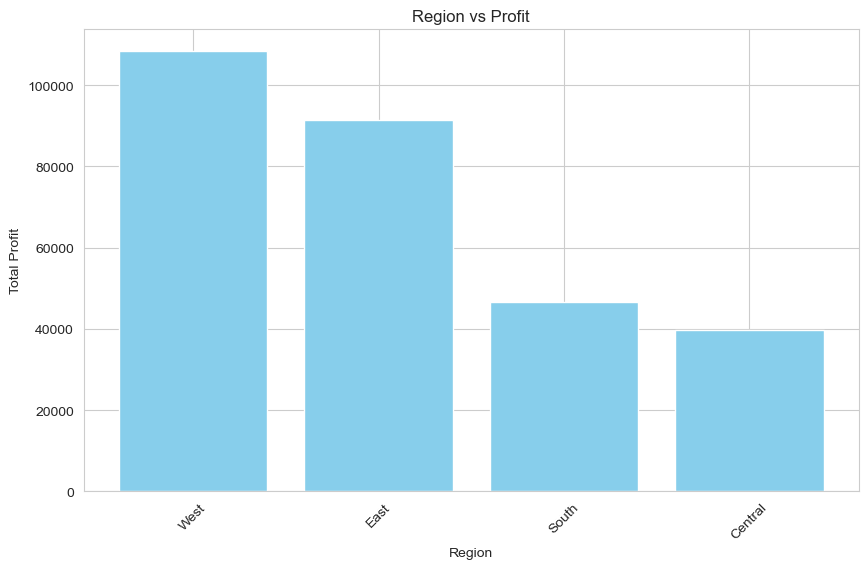

In [51]:
# Group by region and calculate total profit
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Sort by total profit in descending order
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Plot Region vs Profit
plt.figure(figsize=(10, 6))
plt.bar(profit_by_region['Region'], profit_by_region['Profit'], color='skyblue')
plt.title('Region vs Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


In US, we can see maximum profit comes from west region followed by east , south and lowest is from central region.

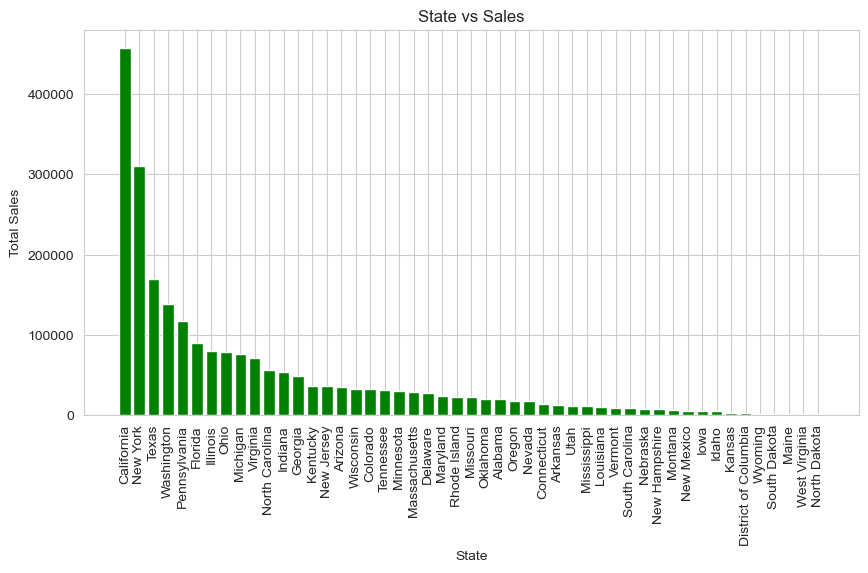

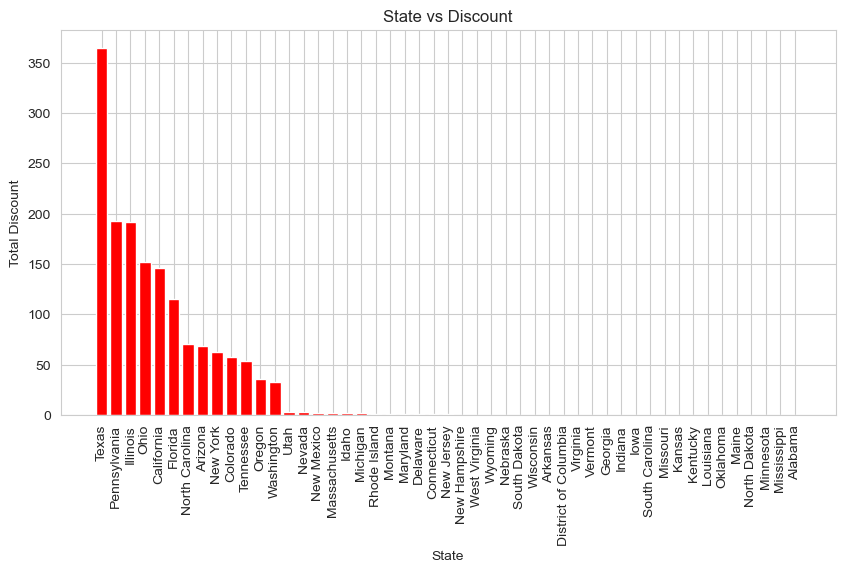

In [60]:
# Group by state and calculate total sales
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
# Group by state and calculate total discount
discount_by_state = df.groupby('State')['Discount'].sum().reset_index()

# Sort by total sales in descending order
sales_by_state = sales_by_state.sort_values(by='Sales', ascending=False)
# Sort by total discount in descending order
discount_by_state = discount_by_state.sort_values(by='Discount', ascending=False)

# Plot State vs Sales
plt.figure(figsize=(10, 5))
plt.bar(sales_by_state['State'], sales_by_state['Sales'], color='green')
plt.title('State vs Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Plot State vs Discount
plt.figure(figsize=(10, 5))
plt.bar(discount_by_state['State'], discount_by_state['Discount'], color='red')
plt.title('State vs Discount')
plt.xlabel('State')
plt.ylabel('Total Discount')
plt.xticks(rotation=90)
plt.show()


1. Maximum sales are from states California,New York.
2. Minimum sales are from North dakota and west virginia.


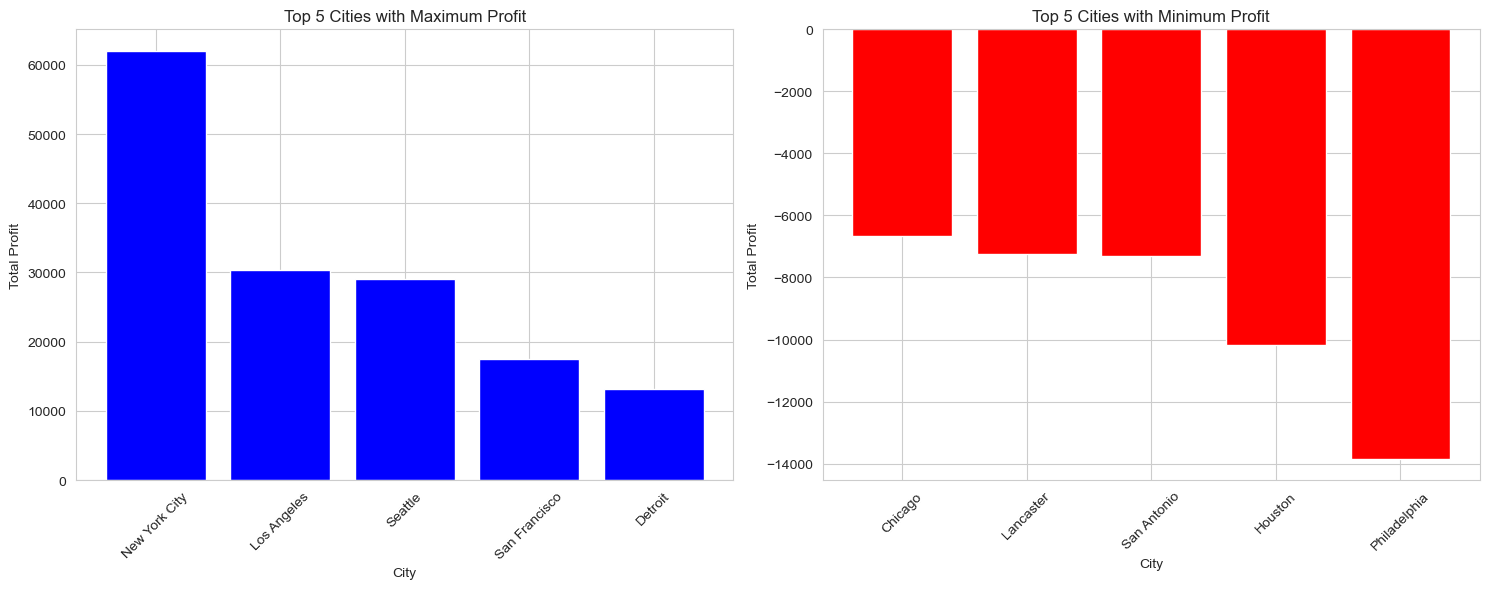

In [63]:
# Group by city and calculate total profit
profit_by_city = df.groupby('City')['Profit'].sum().reset_index()

# Sort by total profit in descending order
profit_by_city_sorted = profit_by_city.sort_values(by='Profit', ascending=False)

# Get top 5 cities with max profit
top_5_max_profit = profit_by_city_sorted.head(5)

# Get top 5 cities with min profit
top_5_min_profit = profit_by_city_sorted.tail(5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for top 5 cities with max profit
axs[0].bar(top_5_max_profit['City'], top_5_max_profit['Profit'], color='blue')
axs[0].set_title('Top 5 Cities with Maximum Profit')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Total Profit')
axs[0].tick_params(axis='x', rotation=45)

# Plot for top 5 cities with min profit
axs[1].bar(top_5_min_profit['City'], top_5_min_profit['Profit'], color='red')
axs[1].set_title('Top 5 Cities with Minimum Profit')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()





Conclusion:

Based on the insights provided:
1. Profitable Segments: Consumer segment has recorded the maximum profit, followed by Corporate, and the lowest profit is from Home Office segment. Focusing on strategies to increase profit from the Home Office segment could be beneficial.

2. Impact of Discounts: It's observed that when the discount given exceeds 20%, the company incurs a loss. Reviewing the discount strategy and optimizing it to ensure profitability could be necessary.

3. Product Performance: Products like copiers, phones, accessories, paper, and binders have generated maximum profit, while tables, bookcases, and supplies have incurred maximum loss. Identifying the reasons behind the poor performance of these products and taking corrective actions could improve overall profitability.

4. Regional Performance: Maximum profit is gained from the West region followed by the East, South, and Central regions. Analyzing the reasons for the regional disparity and implementing targeted strategies to enhance profitability in lower-performing regions could be beneficial.

5. Sales Performance: Maximum sales are from states like California and New York, while minimum sales are from North Dakota and West Virginia. Exploring opportunities to increase sales in regions with lower performance and leveraging the success factors of high-performing regions could drive overall sales growth.

6. City-Level Analysis: Identifying the top-performing cities like New York, Los Angeles, and Seattle, and understanding the factors contributing to their success can help replicate similar strategies in other cities. Similarly, addressing the challenges faced by cities with lower profitability, such as Houston and Philadelphia, can help improve overall profitability.


As a business manager, focusing on optimizing the discount strategy, improving product performance, implementing targeted regional strategies, and leveraging successful sales channels can help address weak areas and drive overall profitability. Additionally, conducting further analysis to understand customer preferences, market trends, and competitor strategies can provide valuable insights for strategic decision-making.